In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

# A Penning Trap Simulation

Here we adapt our previous simulation to consider a particle in a penning trap. This involes introducing a penning trap electric field which has the form:

\begin{align}
     E &= A \cdot \begin{bmatrix}
           2x \\
           2y \\
           -4z
         \end{bmatrix}
\end{align}


In [177]:
class ChargedParticle:
    def __init__(self, mass, charge, postion, velocity):
        self.m = mass
        self.q = charge
        self.r = np.array(postion)
        self.v = np.array(velocity)
    
    def Penning_E_field(self, V_0):
        return(V_0*np.array([2*self.r[0], 2*self.r[1], -4*self.r[2]]))
    
    def Paul_E_field(self, t, w, Udc, Vac):
        return((Udc + Vac*math.cos(w*t))*(np.array([-self.r[0], -self.r[1], 2*self.r[2]])))
        
    def v_r_step(self, dt, E, B):
        # Boris Algorithm
        v_minus = (dt*self.q*E)/(2*self.m) + self.v
        c = (dt*self.q)/(2*self.m)
        
        #solve for v_plus through system of linear equations
        a = np.array([[1, -c*B[2], c*B[1]],[c*B[2], 1, -c*B[0]], [-c*B[1], c*B[0], 1]])
        b = c * np.cross(v_minus, B) + v_minus
        v_plus =np.linalg.solve(a, b)
        
        v_new = v_plus + (dt*self.q*E)/(2*self.m)
        # END OF METHOD SIMILAR TO YOURS
        
        # below is a second version of the Boris Alg i worked out using matrix idenities?
        # does it work? Kind of.       
#         v_new=[]
#         Omega = (self.q*B)/self.m
#         Sigma = (self.q*E)/self.m
#         A = np.array((Omega*dt)/2)
#         C = np.array(self.v + dt*(Sigma + np.cross(self.v, Omega/2)))
#         v_new=(C + A*np.dot(A, C) - np.cross(A, C))/(1+np.dot(A, A))

        #Step and replace position and velocity
        r_new = self.r + v_new*dt
        self.v = np.array(v_new)
        self.r = np.array(r_new)
            

In [178]:
## Initialise particle properties
particles=[]
num_particles=3
q = 1
m = 1
#Initialise B field
B=np.array([0, 0, 0])

#create particle
particle = ChargedParticle(m, q, [2, 2, 2], [1 ,1 , 1])

In [179]:
#iterate through steps0
T=0
V=[]
R=[]
dt=.005
time=[]
V__0=1

om_z = np.sqrt(4*q*V__0/m)
om_c = q*B[2]/m
om_c_p = om_c/2 + np.sqrt(om_c**2/4 - om_z**2/2) 

#lets iterate through time expose our particle to E and B
while T<100:
    time.append(T)

    E = particle.Paul_E_field(T, 4, 0, 2)
    particle.v_r_step(dt, E, B)
        
    R.append(particle.r)
    V.append(particle.v)
    T=T+dt

<ipython-input-179-e9f0c5c8f6ad>:11: RuntimeWarning: invalid value encountered in sqrt
  om_c_p = om_c/2 + np.sqrt(om_c**2/4 - om_z**2/2)


In [180]:
R1=np.transpose(np.array(R))
V1=np.transpose(np.array(V))

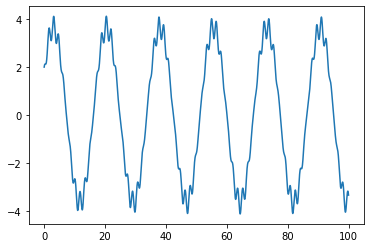

In [181]:
plt.plot(time, R1[0])

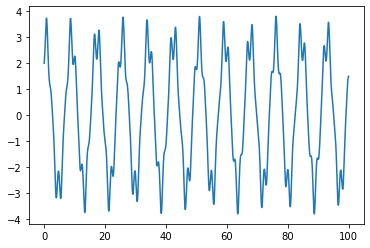

In [182]:
plt.plot(time, R1[2])

(1000, 1000)


<Figure size 720x720 with 0 Axes>

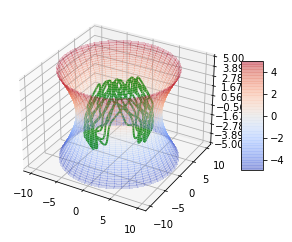

In [183]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
plt.figure(figsize=(10, 10))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
Z = np.linspace(-5, 5, 1000)
R = np.sqrt(2*25 + 2*Z**2)
theta = np.linspace(0, 2*math.pi, 1000)
R, theta = np.meshgrid(R, theta)
Z, Z2 = np.meshgrid(Z, Z)


X = R*np.cos(theta)
Y = R*np.sin(theta)

#Z = np.sqrt((X**2 +Y**2 - 2*25)/2)

print(Z.shape)
#plt.plot(R, Z)

# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

#print(R)

# # Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.2,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
line = plt.plot(R1[0], R1[1], R1[2], lw=2, color='green')[0] 

plt.show()


Look at that, the classic $epitrochoidal$ shape drawn out in the $(x, y)$ dimensions of a penning trap. How abouts $z$?

ValueError: x and y must have same first dimension, but have shapes (20001,) and (1000,)

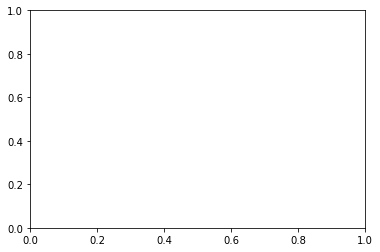

In [148]:
plt.plot(time, R[2])
plt.show()

Nice.